# Cervical Cancer Risk Classification — EDA + Modelos Multivariados

- **EDA completo**: calidad de datos, valores faltantes, distribuciones, relaciones y correlaciones.
- **Supuestos y diagnósticos**: normalidad univariada y multivariada, tratamiento de outliers.
- **Modelos multivariados** (clasificación): *Logistic Regression*, *LDA*, *QDA*, *SVM*, *Random Forest*, *Gradient Boosting* + variantes con **PCA**.
- **Evaluación rigurosa**: validación cruzada estratificada, métricas (AUC, F1, accuracy, recall), matrices de confusión, ROC.


## Introducción

El cáncer cervical es una de las principales causas de morbilidad en mujeres a nivel mundial y constituye un problema crítico de salud pública en regiones de ingresos medios y bajos. La detección temprana mediante pruebas como citología, inspección visual y biopsia es fundamental para reducir la progresión hacia lesiones precancerosas o cáncer invasivo. Sin embargo, el riesgo individual depende de múltiples factores clínicos, demográficos y conductuales que interactúan entre sí, lo que hace necesario el uso de herramientas analíticas avanzadas para comprender estos patrones.

El conjunto de datos utilizado en este estudio proviene del *Hospital Universitario de Caracas* (Venezuela) y fue publicado originalmente en el UCI Machine Learning Repository, así como posteriormente distribuido en Kaggle. El dataset incluye información de 858 mujeres e incorpora 36 variables relacionadas con factores de riesgo, hábitos, historial reproductivo, infecciones de transmisión sexual y resultados de pruebas médicas. Debido a la naturaleza clínica de los datos, algunas variables contienen valores faltantes derivados de decisiones de privacidad de las pacientes.

La diversidad y complejidad de las variables hacen que este dataset sea adecuado para la aplicación de técnicas de análisis multivariado. En particular, permite estudiar cómo interactúan distintos factores de riesgo y evaluar modelos predictivos capaces de estimar la probabilidad de un resultado positivo en la prueba de biopsia, considerada el diagnóstico más confiable al basarse en análisis histológico.

Este proyecto se centra en el uso de modelos de clasificación multivariada para identificar los factores más asociados al riesgo de cáncer cervical y construir un modelo predictivo que contribuya a la identificación temprana de casos de alto riesgo. A través de un análisis exploratorio, comparaciones de modelos y evaluación de métricas de rendimiento, se busca ofrecer una aproximación estadística clara y fundamentada al estudio de una condición de gran relevancia epidemiológica.


## Descripción del dataset “Cervical Cancer Risk Factors” (Kaggle)

El conjunto de datos utilizado proviene de la plataforma Kaggle, bajo el nombre “Risk Factors for Cervical Cancer”. Contiene 858 registros y 36 variables que recogen información clínica, demográfica y conductual relacionada con el riesgo de desarrollar lesiones precancerosas o cáncer de cuello uterino.

El dataset puede agruparse en los siguientes bloques principales:

---


### A. Variables demográficas
- **Age**: edad de la paciente.

---

### B. Variables de comportamiento sexual
Estas variables reflejan antecedentes reproductivos y sexuales asociados a riesgo clínico:

- **Number of sexual partners**
- **First sexual intercourse** (edad de inicio)
- **Num of pregnancies**

---

### C. Hábitos y uso de anticonceptivos
Incluye factores de estilo de vida relevantes en epidemiología:

- **Smokes** (sí/no)
- **Smokes (years)**
- **Smokes (packs/year)**
- **Hormonal Contraceptives** (uso)
- **Hormonal Contraceptives (years)**
- **IUD** (uso)
- **IUD (years)**

---

### D. Infecciones de transmisión sexual (STDs)
Registra historial de enfermedades que aumentan el riesgo cervicouterino:

- **STDs (general)**
- **STDs: condylomatosis**
- **STDs: syphilis**
- **STDs: AIDS**
- **STDs: hepatitis B**
- **STDs: HPV**
- **STDs: number of diagnosis**
- **STDs: time since first diagnosis**
- **STDs: time since last diagnosis**

> Muchas de estas variables incluyen valores faltantes representados como `"?"`, lo que requiere limpieza previa.

---

### E. Variables diagnósticas (resultados clínicos)
Estas variables corresponden a pruebas médicas utilizadas para identificar lesiones:

- **Hinselmann**
- **Schiller**
- **Citology**
- **Dx:Cancer**
- **Dx:CIN**
- **Dx:HPV**
- **Dx** (diagnóstico general)
- **Biopsy** ← *variable objetivo*, considerada la prueba más confiable al basarse en tejido histológico.

---

## Relevancia del dataset

Este conjunto de datos proviene del *Hospital Universitario de Caracas* en Venezuela y fue publicado inicialmente en el UCI Machine Learning Repository. Su relevancia radica en que contiene información clínica real de 858 mujeres, incluyendo factores demográficos, conductuales, antecedentes de infecciones de transmisión sexual y resultados de pruebas médicas utilizadas para detectar lesiones cervicales.

El dataset es valioso para estudios de salud pública porque:

- Integra factores de riesgo conocidos para cáncer cervical.
- Incluye resultados diagnósticos validados (Hinselmann, Schiller, Citology y especialmente **Biopsy**).
- Presenta variabilidad real del entorno clínico, incluyendo valores faltantes producto de confidencialidad.
- Permite desarrollar y comparar modelos predictivos en un contexto epidemiológico real.
- Facilita la aplicación de técnicas multivariadas tanto supervisadas como no supervisadas.

https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors

Lo hace especialmente adecuado para:

- **Análisis multivariado**
- **Modelos de predicción de riesgo**
- **Identificación de perfiles (clustering)**
- **Aplicación de técnicas supervisadas y no supervisadas**


## Metodología

La metodología aplicada en este estudio combina análisis exploratorio, preparación de datos y técnicas de clasificación multivariada para predecir la probabilidad de un resultado positivo en la prueba de biopsia. A continuación, se describen los procedimientos utilizados.

### 1. Selección de la técnica multivariada

Debido a que la variable objetivo **Biopsy** es de tipo binario (0 = negativo, 1 = positivo), se seleccionaron modelos de **clasificación multivariada**, principalmente:

- **Regresión Logística**
- **Support Vector Machine (SVM)**
- **Random Forest**
- **Gradient Boosting**

Estas técnicas permiten evaluar simultáneamente el efecto de múltiples variables clínicas, demográficas y conductuales sobre la probabilidad de un diagnóstico positivo. La regresión logística se incluyó por ser el método más utilizado en epidemiología, mientras que los modelos no lineales (SVM y ensambles) se incorporaron para comparar mejoras en capacidad predictiva.

---

### 2. Preparación y limpieza del dataset

El dataset incluye valores faltantes representados con `"?"` debido a restricciones de privacidad de las pacientes. Para su correcto procesamiento:

- Se reemplazaron los `"?"` por valores `NaN`.
- Se convirtieron todas las variables a tipo numérico.
- Se eliminaron registros con un porcentaje excesivo de datos faltantes.
- Para variables con pocos valores faltantes, se utilizó **imputación** mediante:
  - Mediana (variables continuas)
  - Moda (variables binarias)

Este proceso permitió conservar la mayor proporción posible de casos manteniendo consistencia analítica.

---

### 3. Ingeniería y transformación de variables

Para garantizar la calidad del análisis:

- Se identificaron las variables diagnósticas y de riesgo clínico.
- Todas las variables fueron **escaladas** mediante estandarización (`StandardScaler`) para mejorar el desempeño de modelos sensibles a escala, como SVM y regresión logística.
- No se aplicó codificación categórica adicional porque todas las variables son binarias o numéricas.
- Se verificó la presencia de correlaciones fuertes mediante un análisis exploratorio inicial.

---

### 4. Manejo del desbalance

La variable **Biopsy** presenta un desbalance significativo (803 negativas vs. 55 positivas). Para evitar que los modelos favorecieran la clase mayoritaria se aplicó:

- **Class_weight="balanced"** en modelos lineales y SVM.
- Ajuste automático de pesos en Random Forest y Gradient Boosting.
- Estratificación en todas las particiones de entrenamiento y prueba.

Esto permitió que los modelos aprendieran adecuadamente la estructura de la clase minoritaria.

---

### 5. División de datos y validación

Los datos fueron divididos en:

- **80%** para entrenamiento  
- **20%** para prueba

Se utilizó **validación cruzada estratificada (StratifiedKFold)** para obtener estimaciones estables del rendimiento e impedir que variaciones en el conjunto de entrenamiento afectaran los resultados.

---

### 6. Entrenamiento y comparación de modelos

Cada modelo fue entrenado utilizando:

- Los datos limpios y escalados
- El conjunto de entrenamiento estratificado
- Métricas apropiadas para clasificación desbalanceada:

  - **Precision**
  - **Recall**
  - **F1-score**
  - **ROC-AUC**

La métrica principal para seleccionar el mejor modelo fue **ROC-AUC**, al proporcionar una evaluación independiente del punto de corte y ser ideal para problemas con clases desbalanceadas.

---

### 7. Selección del mejor modelo e interpretación

Una vez comparados los modelos, se eligió el de mejor rendimiento global en las métricas de validación. Posteriormente se interpretaron:

- Variables más influyentes
- Capacidades predictivas
- Implicaciones clínicas de los resultados
- Limitaciones relacionadas con el desbalance y la calidad del dataset

Este enfoque permitió integrar métodos estadísticos rigurosos con una interpretación orientada a salud pública.


## 1) Carga del dataset

Configura `DATA_PATH` con el nombre/ruta del archivo CSV descargado desde Kaggle.
Luego cargamos y hacemos una primera inspección.


In [21]:

# ====== Configuración de ruta ======
DATA_PATH = "kag_risk_factors_cervical_cancer.csv"  # <-- ajusta esto si tu archivo se llama diferente

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,
                             RocCurveDisplay)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



df_raw = pd.read_csv(DATA_PATH)
print("Shape:", df_raw.shape)
display(df_raw.head())
df_raw.info()


Shape: (858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

## 2) Limpieza básica y tipado

Este dataset suele incluir:
- valores faltantes representados como `"?"` o strings vacíos,
- columnas booleanas (0/1) y numéricas,
- posibles mezclas de tipos.

Estrategia:
1. Reemplazar `"?"`/vacíos por `NaN`.
2. Convertir columnas a numérico cuando sea posible.
3. Crear una copia `df` lista para análisis.


In [7]:

df = df_raw.copy()

# Reemplazo robusto de símbolos de faltantes
df = df.replace(["?", " ? ", "NA", "N/A", "", " "], np.nan)

# Intentar convertir a numérico (si falla, se mantiene como objeto)
for c in df.columns:
    if df[c].dtype == "object":
        df[c] = pd.to_numeric(df[c], errors="ignore")

# Si aún quedan objetos, intenta de nuevo forzando a numérico (coerce) cuando haya muchos valores numéricos
for c in df.columns:
    if df[c].dtype == "object":
        # Heurística: si 80% se puede convertir a numérico, convertir con coerce
        coerced = pd.to_numeric(df[c], errors="coerce")
        ratio_numeric = coerced.notna().mean()
        if ratio_numeric >= 0.80:
            df[c] = coerced

print("Tipos finales:")
display(df.dtypes.value_counts())
display(df.head())


Tipos finales:


C:\Users\guiss\AppData\Local\Temp\ipykernel_27916\779124273.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


float64    26
int64      10
Name: count, dtype: int64

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


## 3) Selección de variable objetivo (target)

In [8]:
TARGET = "Biopsy"
print("Target seleccionado:", TARGET)
display(df[TARGET].value_counts(dropna=False))

Target seleccionado: Biopsy


Biopsy
0    803
1     55
Name: count, dtype: int64

## 4) Calidad de datos: faltantes, duplicados y distribución del target

Duplicados: 23


,missing_ratio
STDs: Time since last diagnosis,0.917249
STDs: Time since first diagnosis,0.917249
IUD,0.136364
IUD (years),0.136364
Hormonal Contraceptives,0.125874
Hormonal Contraceptives (years),0.125874
STDs:pelvic inflammatory disease,0.122378
STDs:vulvo-perineal condylomatosis,0.122378
STDs:HPV,0.122378
STDs:Hepatitis B,0.122378


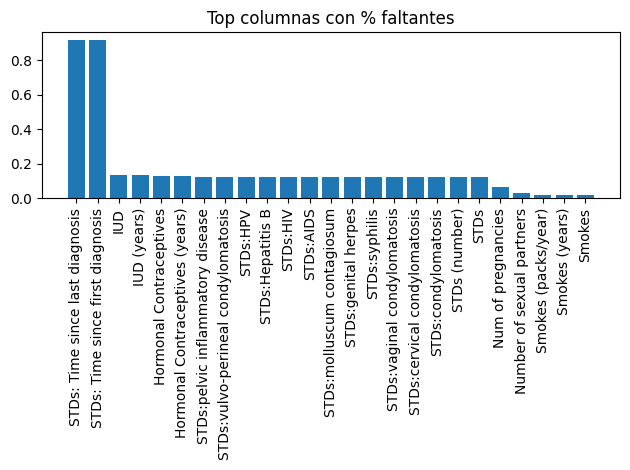

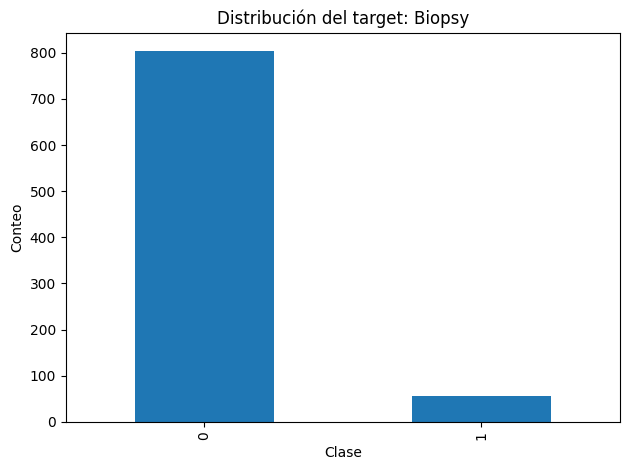

In [20]:
# Duplicados
dup = df.duplicated().sum()
print("Duplicados:", dup)

# Faltantes por columna (si quieres mostrar algo en el informe)
missing = df.isna().mean().sort_values(ascending=False)
display(missing.to_frame("missing_ratio").head(15))

# Visual simple de missingness (top 25)
top = missing.head(25)
plt.figure()
plt.bar(range(len(top)), top.values)
plt.xticks(range(len(top)), top.index, rotation=90)
plt.title("Top columnas con % faltantes")
plt.tight_layout()
plt.show()

# Distribución del target
y = df[TARGET]
y.value_counts(dropna=False).plot(kind="bar")
plt.title(f"Distribución del target: {TARGET}")
plt.xlabel("Clase")
plt.ylabel("Conteo")
plt.tight_layout()
plt.show()


## 5) EDA
> Nota: muchas variables son discretas/booleanas, así que “normalidad” no siempre es aplicable. Aun así, verificaremos numéricas continuas y reportaremos resultados.


Numéricas (sin target): 35


,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


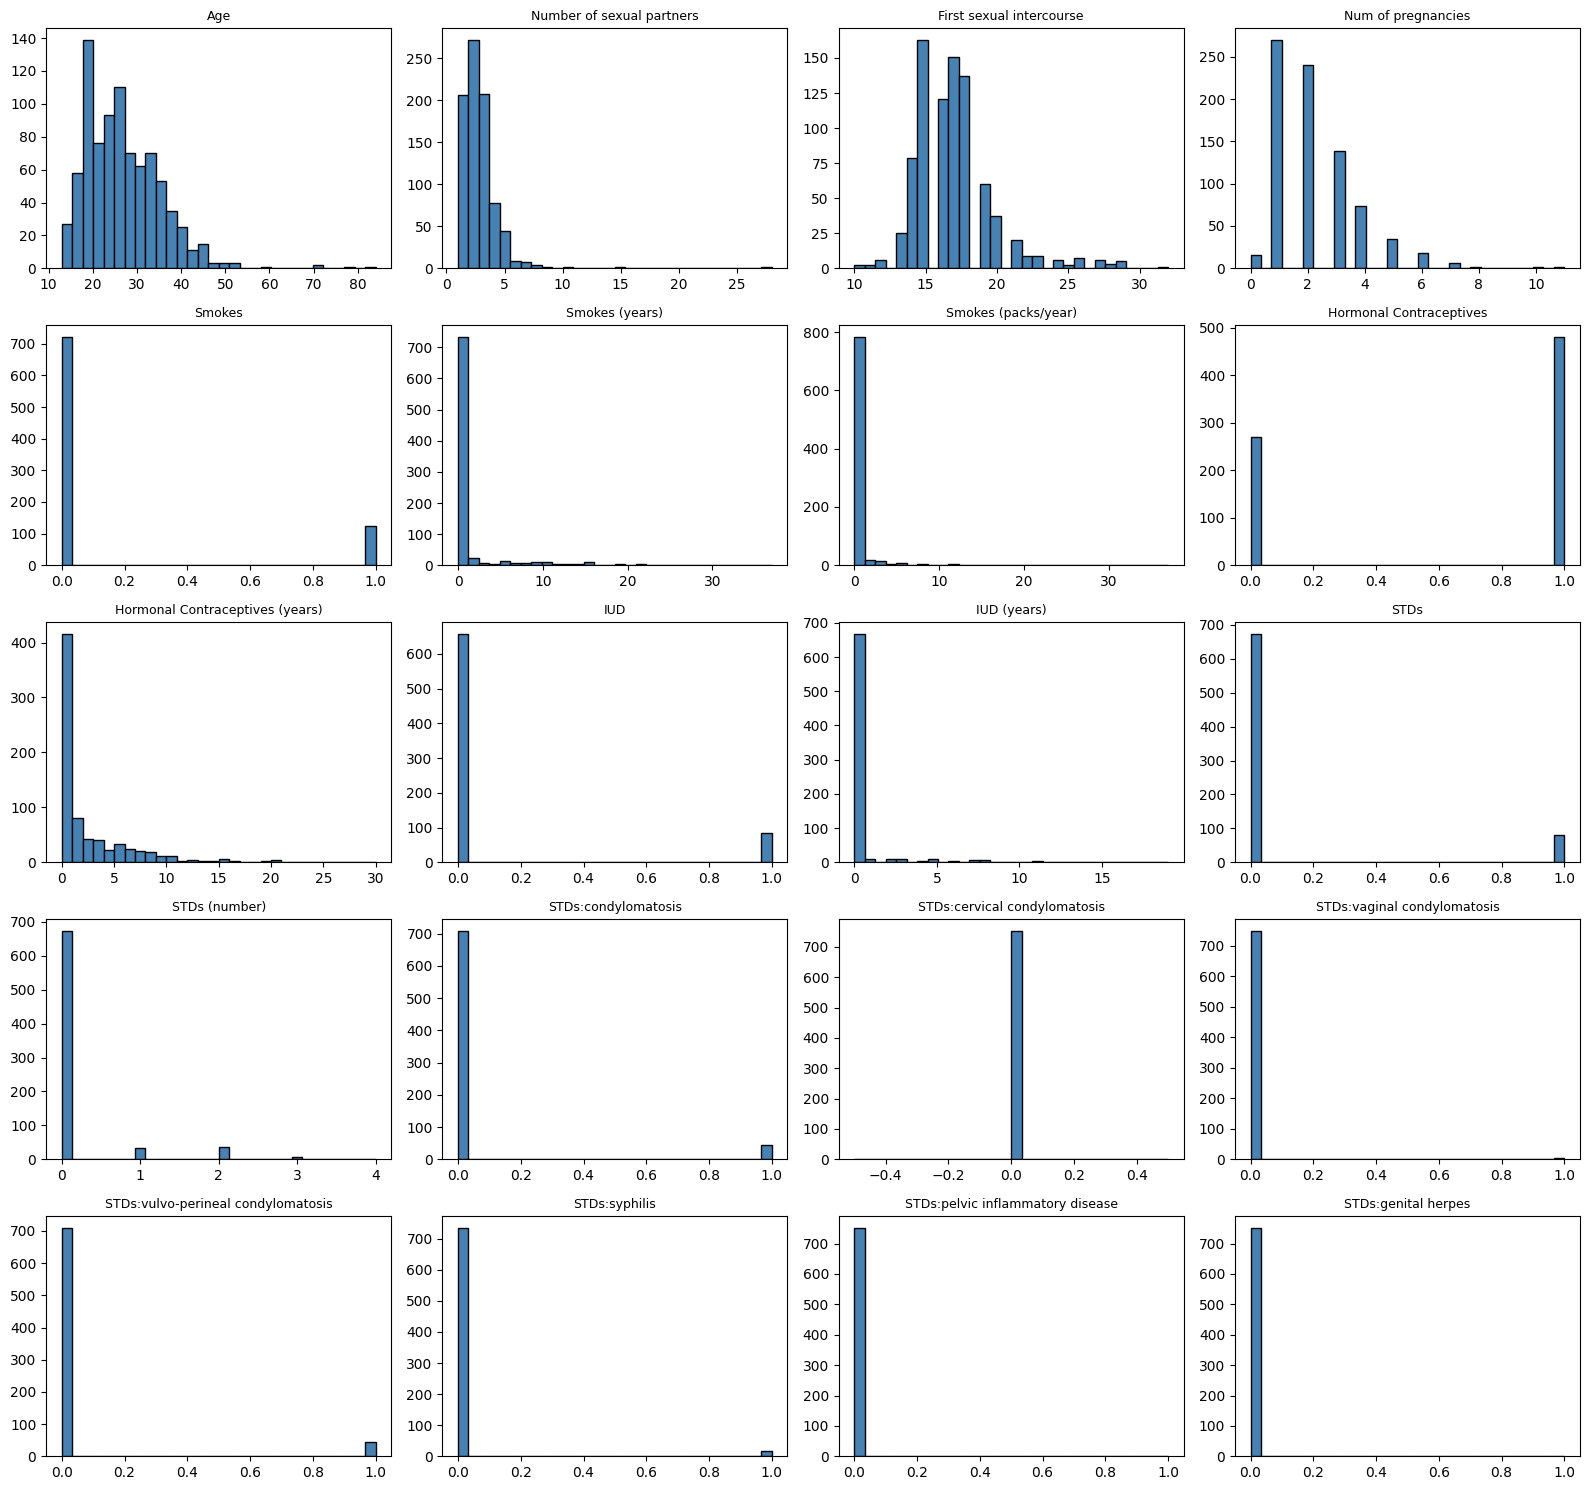

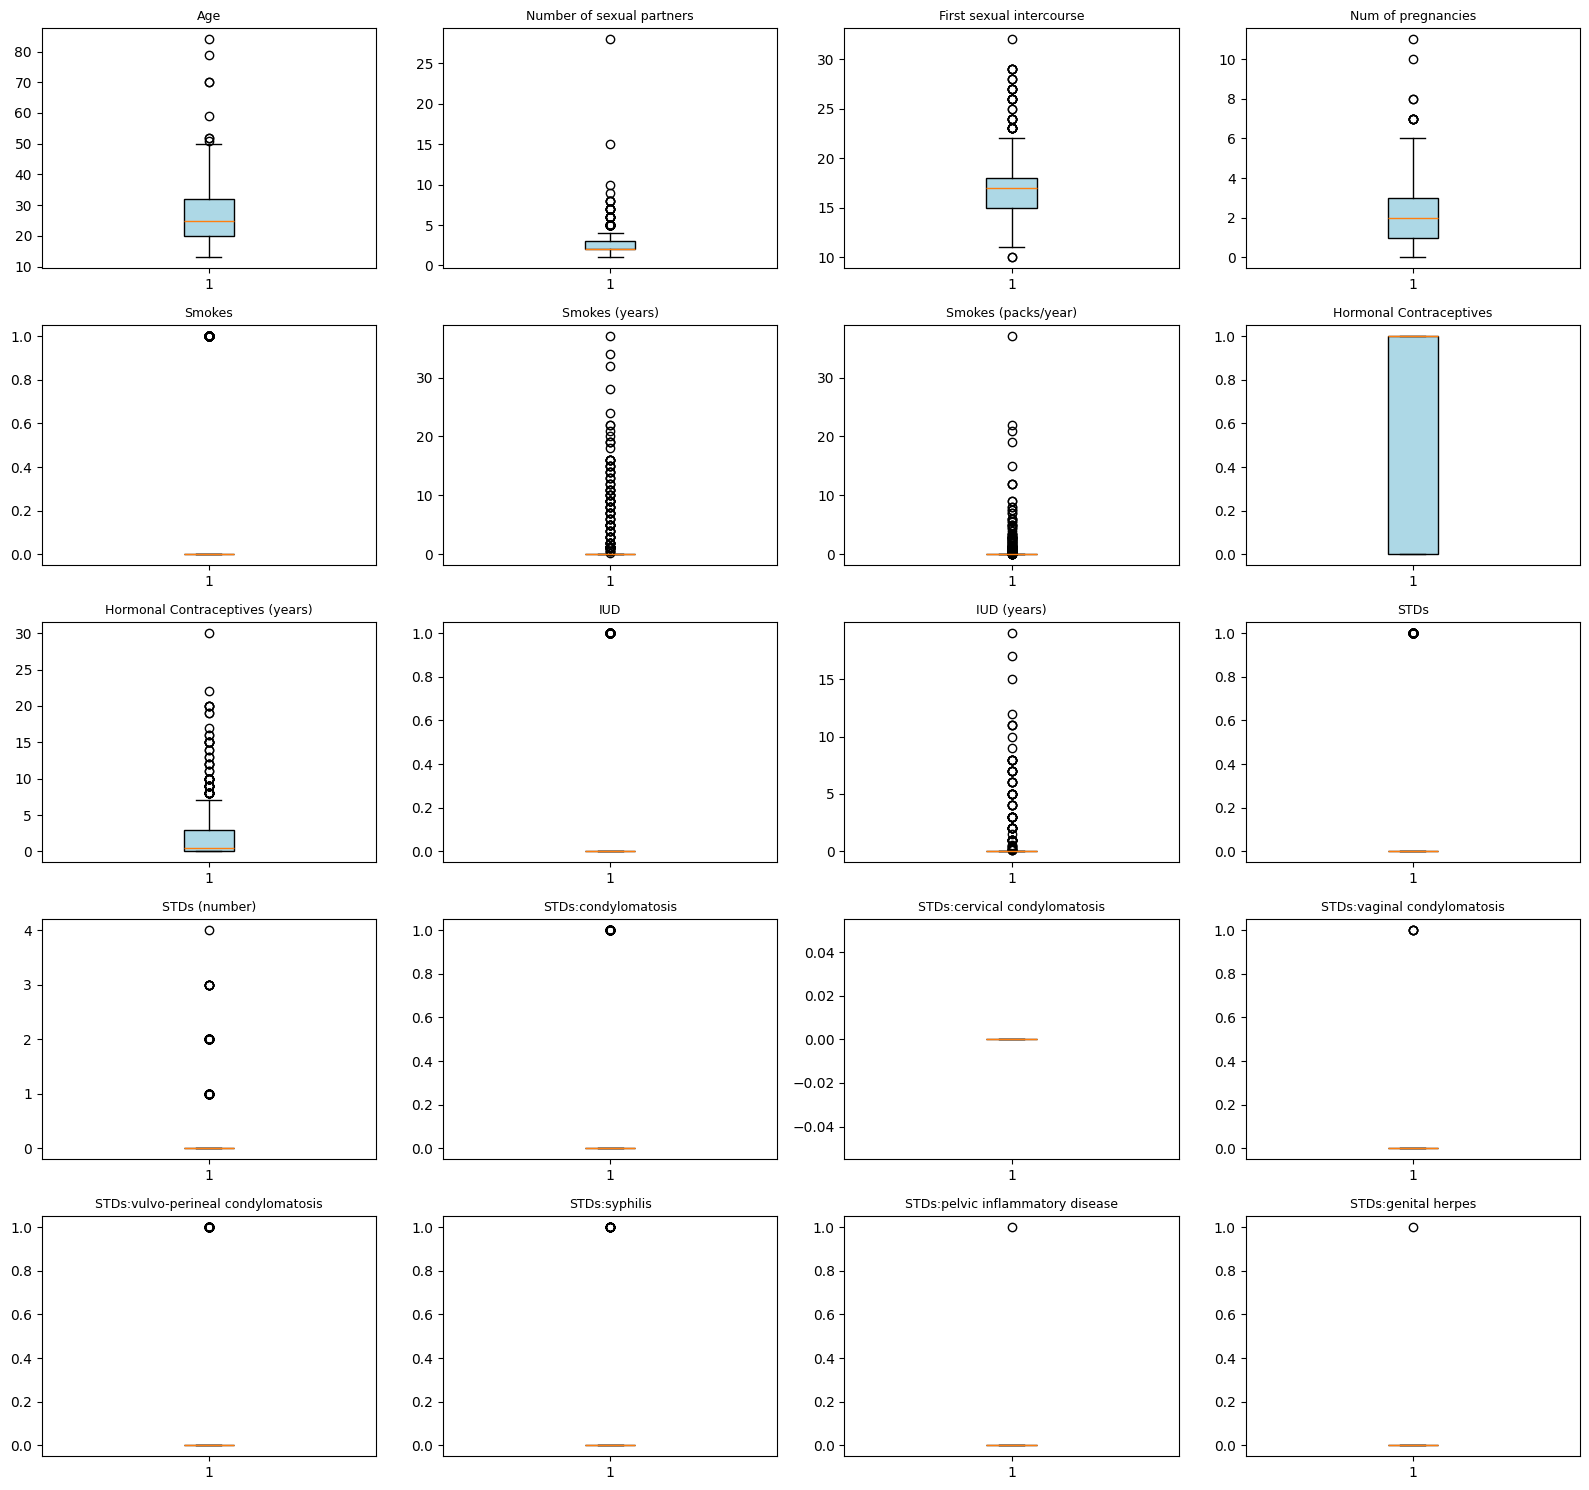

In [27]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Evitar incluir el target en la lista de predictoras
num_cols_wo_target = [c for c in num_cols if c != TARGET]

print("Numéricas (sin target):", len(num_cols_wo_target))
display(df[num_cols_wo_target].describe().T)

# Número máximo de histogramas
max_plots = 20

# Columnas a graficar (las primeras 20 como ya tenías)
cols_to_plot = num_cols_wo_target[:max_plots]

# Configurar tamaño de la cuadrícula
cols_per_row = 4   # Cambia a 5 si querés más compacto
rows = math.ceil(len(cols_to_plot) / cols_per_row)

# Crear figura global
plt.figure(figsize=(cols_per_row * 4, rows * 3))

for i, c in enumerate(cols_to_plot):
    plt.subplot(rows, cols_per_row, i + 1)
    s = df[c].dropna()
    plt.hist(s, bins=30, color="steelblue", edgecolor="black")
    plt.title(c, fontsize=9)
    plt.tight_layout()

plt.show()

# Número máximo de boxplots
max_plots = 20
cols_to_plot = num_cols_wo_target[:max_plots]

# Configuración de la grilla
cols_per_row = 4
rows = math.ceil(len(cols_to_plot) / cols_per_row)

plt.figure(figsize=(cols_per_row * 4, rows * 3))

for i, c in enumerate(cols_to_plot):
    plt.subplot(rows, cols_per_row, i + 1)
    s = df[c].dropna()
    plt.boxplot(s, vert=True, patch_artist=True,
                boxprops=dict(facecolor="lightblue"))
    plt.title(c, fontsize=9)
    plt.tight_layout()

plt.show()


## 6) Relaciones y correlación

- Matriz de correlación (numéricas)
- Asociación con el target (correlación punto-biserial / Pearson con y binaria)


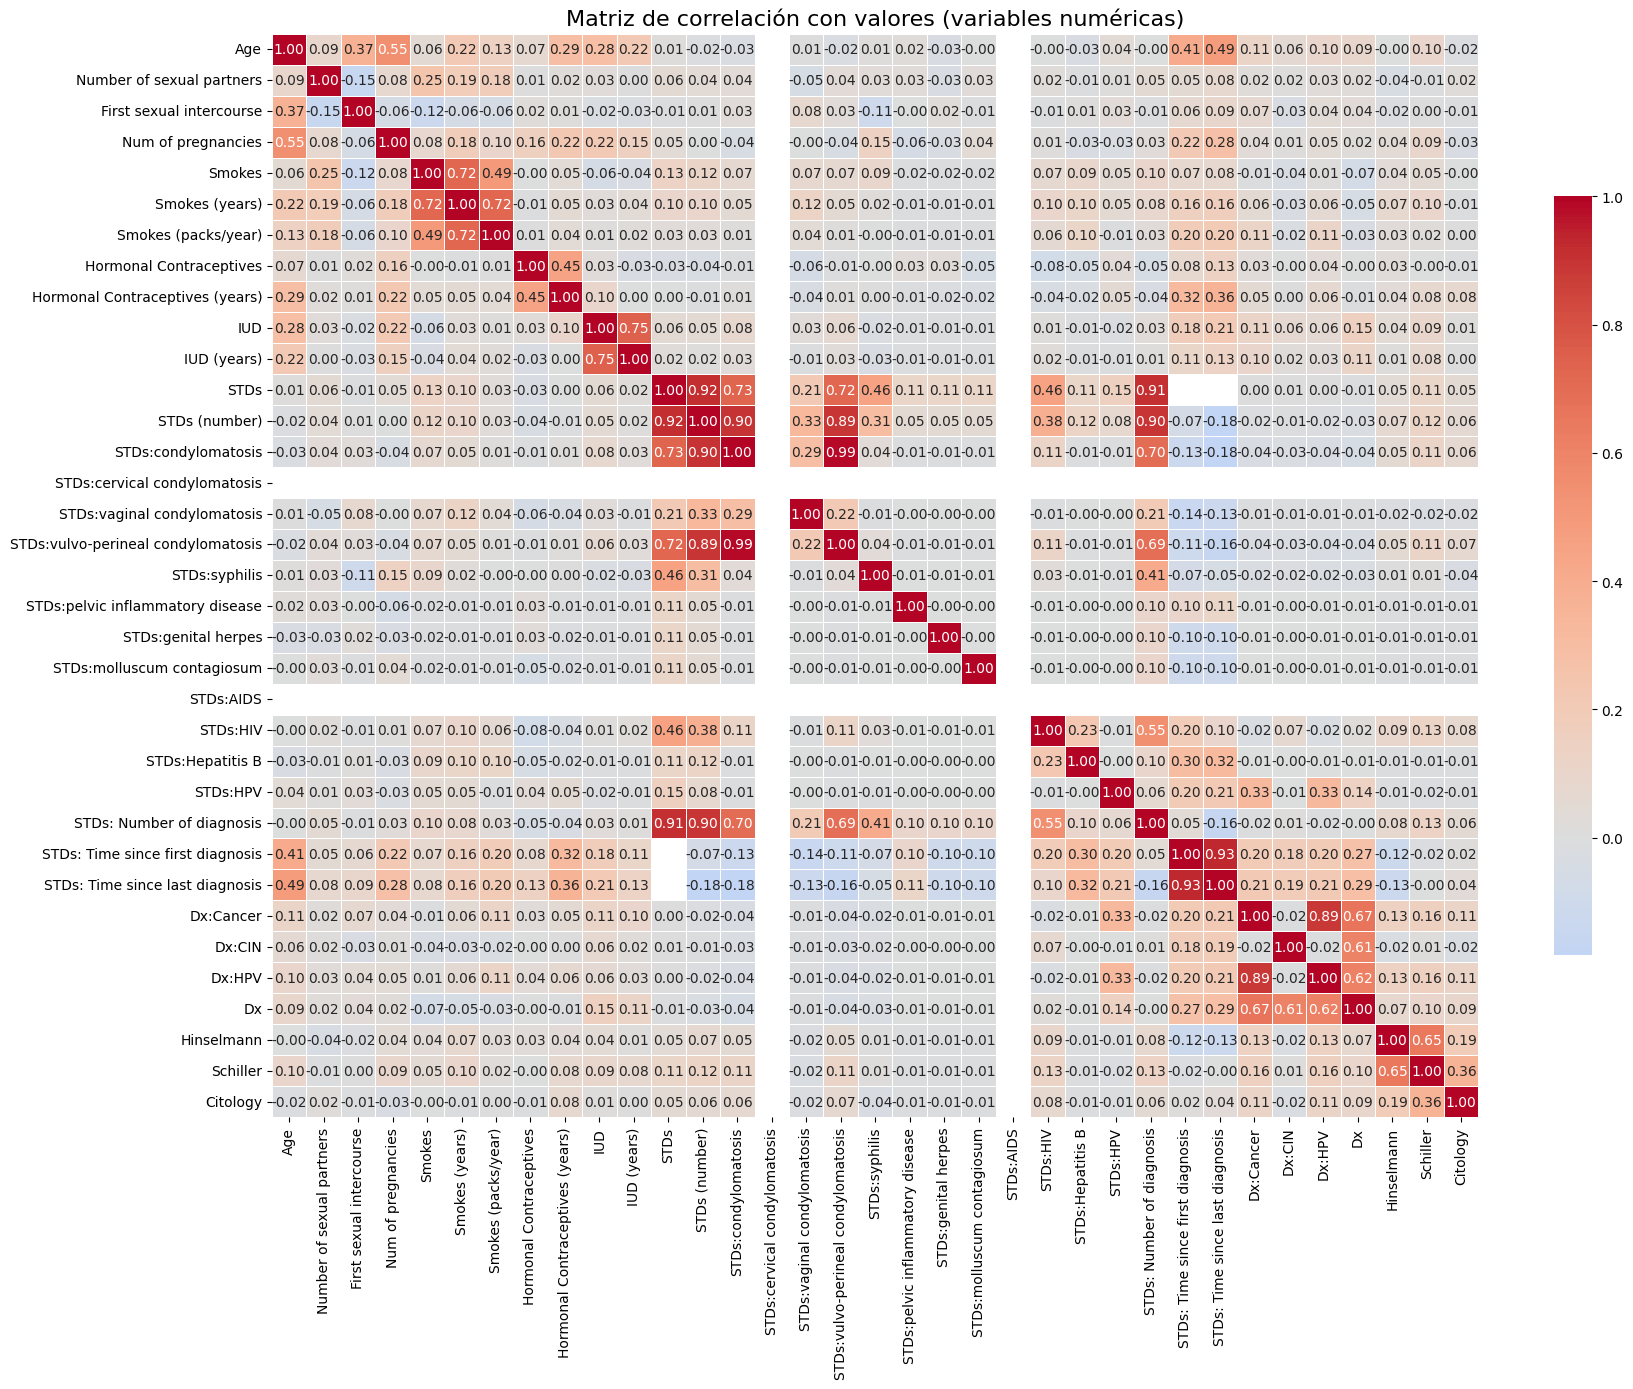

c:\Users\guiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\guiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\guiss\AppData\Local\Temp\ipykernel_27916\2324460966.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


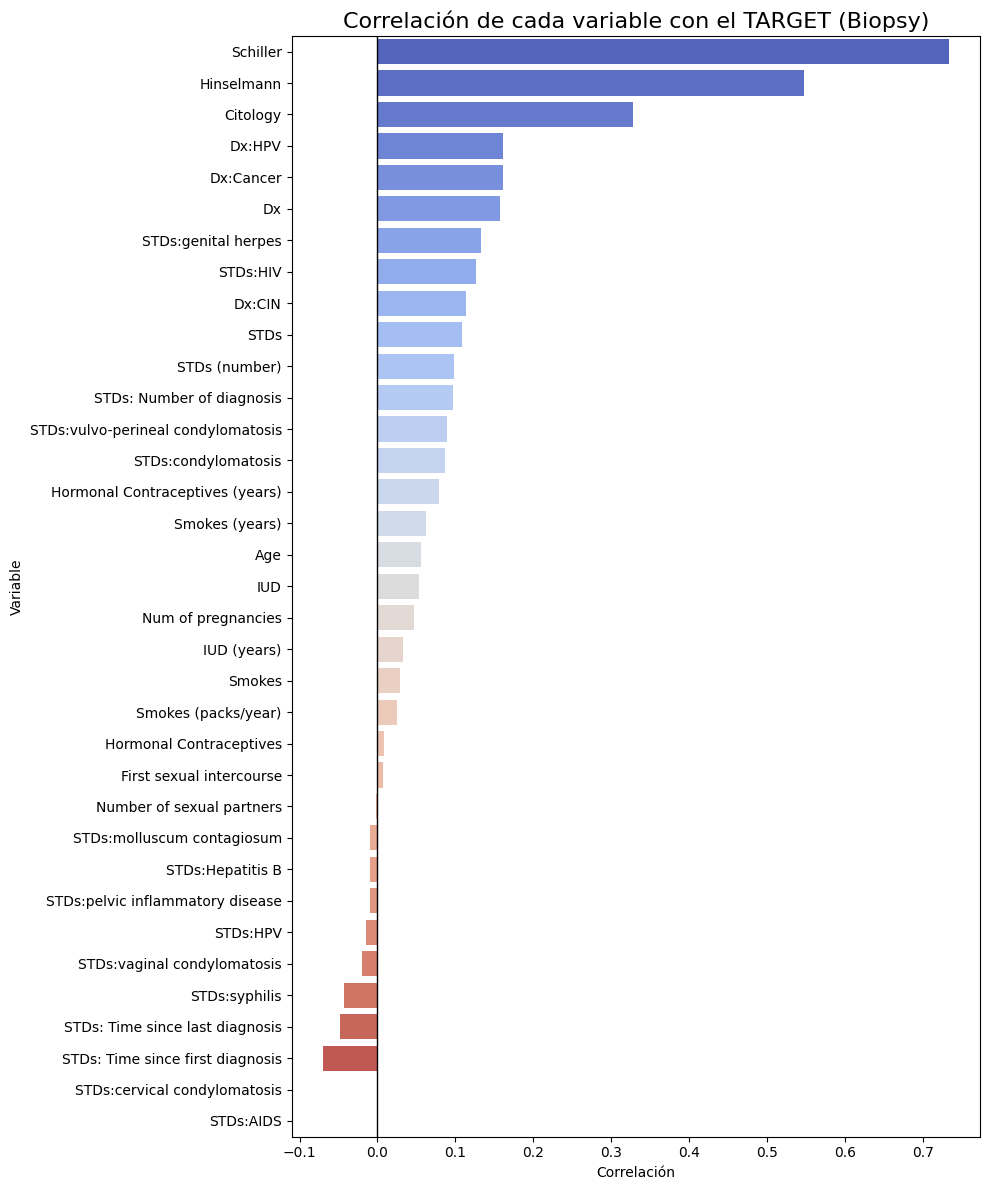

,corr_with_target
Schiller,0.733204
Hinselmann,0.547417
Citology,0.327466
Dx:HPV,0.160905
Dx:Cancer,0.160905
Dx,0.157607
STDs:genital herpes,0.132526
STDs:HIV,0.126880
Dx:CIN,0.113172
STDs,0.109099


In [11]:
#Correlaciones
corr = df[num_cols_wo_target].corr()
plt.figure(figsize=(18, 14))
cmap = sns.diverging_palette(240, 10, as_cmap=True).reversed() 
sns.heatmap(
    corr,
    annot=True,           # muestra los valores de correlación
    fmt=".2f",            # formato de números
    cmap="coolwarm",      # colormap similar al de tu segunda imagen
    center=0,             # 0 al centro
    linewidths=0.5,       # líneas finas entre celdas
    cbar_kws={'shrink': 0.7}  # barra más pequeña
)

plt.title("Matriz de correlación con valores (variables numéricas)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calcular correlación del target con las variables numéricas
y = df[TARGET].astype(float)

corr_target = df[num_cols_wo_target].corrwith(y)

# Convertir a dataframe ordenado
corr_target = corr_target.sort_values(ascending=False).to_frame("corr_with_target")
corr_target.head(20)

plt.figure(figsize=(10, 12))

sns.barplot(
    data=corr_target,
    x="corr_with_target",
    y=corr_target.index,
    palette="coolwarm"
)

plt.title("Correlación de cada variable con el TARGET (Biopsy)", fontsize=16)
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()


if set(y.dropna().unique()).issubset({0,1}):
    y_num = y.astype(float)
    assoc = {}
    for c in num_cols_wo_target:
        s = df[c]
        tmp = pd.concat([s, y_num], axis=1).dropna()
        if tmp.shape[0] >= 10 and tmp[c].nunique() > 1:
            assoc[c] = np.corrcoef(tmp[c].astype(float), tmp[TARGET])[0,1]
    assoc = pd.Series(assoc).sort_values(key=lambda x: x.abs(), ascending=False)
    display(assoc.to_frame("corr_with_target").head(20))


## 7) Outliers (univariados) y estrategias de tratamiento

Usaremos 2 detectores simples:
- **IQR** (Tukey)
- **Z-score robusto** vía MAD (Median Absolute Deviation)

Luego compararemos 2 estrategias:
1) **Sin eliminar** (solo imputación/escala).
2) **Filtrado en entrenamiento** con **IsolationForest** (multivariado) para robustez.


In [13]:

def outliers_iqr(series, k=1.5):
    s = pd.to_numeric(series, errors="coerce").dropna()
    if s.empty:
        return pd.Index([])
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return series[(series < lo) | (series > hi)].index

def outliers_mad(series, thresh=3.5):
    x = pd.to_numeric(series, errors="coerce")
    med = np.nanmedian(x)
    mad = np.nanmedian(np.abs(x - med))
    if mad == 0 or np.isnan(mad):
        return pd.Index([])
    z = 0.6745 * (x - med) / mad
    return series[np.abs(z) > thresh].index

outlier_report = []
for c in num_cols_wo_target:
    if df[c].dropna().nunique() < 5:
        continue
    idx_iqr = outliers_iqr(df[c])
    idx_mad = outliers_mad(df[c])
    outlier_report.append((c, len(idx_iqr), len(idx_mad)))

outlier_report = pd.DataFrame(outlier_report, columns=["feature","n_outliers_iqr","n_outliers_mad"])
outlier_report["max_outliers"] = outlier_report[["n_outliers_iqr","n_outliers_mad"]].max(axis=1)
display(outlier_report.sort_values("max_outliers", ascending=False).head(20))


,feature,n_outliers_iqr,n_outliers_mad,max_outliers
6,Hormonal Contraceptives (years),68,172,172
4,Smokes (years),123,0,123
5,Smokes (packs/year),123,0,123
7,IUD (years),83,0,83
8,STDs (number),79,0,79
1,Number of sexual partners,68,8,68
2,First sexual intercourse,41,9,41
3,Num of pregnancies,10,4,10
10,STDs: Time since last diagnosis,9,10,10
0,Age,8,5,8


### Validación del supuesto de normalidad multivariada

Para evaluar el supuesto teórico de normalidad requerido por el Análisis Discriminante Lineal (LDA), se aplicó la prueba de normalidad multivariada de Mardia. Los resultados muestran que tanto la curtosis como la asimetría multivariada presentan valores significativos (p < 0.05), lo cual indica que el supuesto de normalidad multivariada no se cumple en este conjunto de datos.

Este resultado es esperable debido a que la mayoría de las variables del dataset son binarias o discretas, lo que dificulta que sigan una distribución normal. Sin embargo, la literatura reconoce que LDA puede aplicarse de manera práctica aun cuando los supuestos no se cumplen estrictamente, especialmente cuando se utiliza con fines comparativos. No obstante, se justifica el uso predominante de modelos más robustos ante violaciones de supuestos, como Random Forest, SVM y Gradient Boosting.


In [15]:
import pingouin as pg

# Seleccionar variables numéricas (excluyendo el target)
X_numeric = df[num_cols_wo_target].dropna()

# Test de normalidad multivariada de Mardia
mardia = pg.multivariate_normality(X_numeric, alpha=0.05)
mardia


HZResults(hz=236, pval=0.0, normal=False)

## 8) Modelado multivariado (clasificación)

### Modelos incluidos
- **Baseline**: DummyClassifier
- **Logistic Regression** (L2) — modelo lineal probabilístico, robusto y explicable
- **LDA** — requiere supuestos más fuertes (normalidad multivariada, covarianzas similares)
- **QDA** — normalidad multivariada, covarianzas distintas (más flexible pero más inestable con pocos datos)
- **SVM RBF** — no paramétrico, funciona bien en fronteras no lineales
- **Random Forest** — robusto a no linealidad y outliers
- **Gradient Boosting** — potente en tabulares

### Preprocesamiento
- imputación (mediana / moda),
- escalado,
- codificación OneHot si existen categóricas.

Se usa **validación cruzada estratificada** y métricas:
- **ROC-AUC** (si binario),
- **F1**,
- **Accuracy**,
- **Recall**.

> Importante: para evitar leakage, todo va dentro de Pipelines.


In [16]:
# Features / target
y = df[TARGET]
X = df.drop(columns=[TARGET])

# Mantener solo filas con target no nulo
mask = y.notna()
X = X.loc[mask].copy()
y = y.loc[mask].copy()

# Asegurar que sea numérico
y = pd.to_numeric(y, errors="coerce")
uniq = sorted(pd.Series(y.dropna().unique()).tolist())
print("Clases únicas target:", uniq)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y if len(uniq) <= 2 else None
)

# Columnas numéricas/categóricas
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in X_train.columns if c not in num_features]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_features),
        ("cat", categorical_pipe, cat_features)
    ],
    remainder="drop"
)

models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "LogReg_L2": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(reg_param=0.0),
    "SVM_RBF": SVC(kernel="rbf", probability=True, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced_subsample"),
    "GradBoost": GradientBoostingClassifier(random_state=42),
}

scoring = {
    "acc": "accuracy",
    "f1": "f1",
    "recall": "recall",
    "roc_auc": "roc_auc"
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
pipes = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipes[name] = pipe
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, error_score="raise")
    row = {"model": name}
    for k, v in scores.items():
        if k.startswith("test_"):
            row[k.replace("test_", "")] = float(np.mean(v))
            row[k.replace("test_", "")+"_std"] = float(np.std(v))
    results.append(row)

results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
display(results_df)


Clases únicas target: [0, 1]


,model,acc,acc_std,f1,f1_std,recall,recall_std,roc_auc,roc_auc_std
6,GradBoost,0.956300,0.014456,0.649270,0.112194,0.633333,0.119670,0.961298,0.027026
5,RandomForest,0.953359,0.003487,0.518260,0.079562,0.405556,0.104822,0.959742,0.021762
4,SVM_RBF,0.944631,0.017535,0.580179,0.152605,0.619444,0.202530,0.957087,0.004845
1,LogReg_L2,0.946091,0.010741,0.668221,0.028313,0.841667,0.112354,0.954307,0.027210
2,LDA,0.951909,0.005692,0.702121,0.032996,0.886111,0.070492,0.949337,0.028795
3,QDA,0.109299,0.015734,0.118246,0.009810,0.933333,0.088889,0.793766,0.096151
0,Dummy,0.935862,0.002878,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000


## 9) Entrenamiento final del mejor modelo + evaluación en test

Entrenamos el pipeline ganador (por ROC-AUC) y evaluamos en test:

- Matriz de confusión
- Reporte de clasificación
- Curva ROC y AUC


Mejor modelo (CV): GradBoost
              precision    recall  f1-score   support

           0     0.9752    0.9752    0.9752       161
           1     0.6364    0.6364    0.6364        11

    accuracy                         0.9535       172
   macro avg     0.8058    0.8058    0.8058       172
weighted avg     0.9535    0.9535    0.9535       172



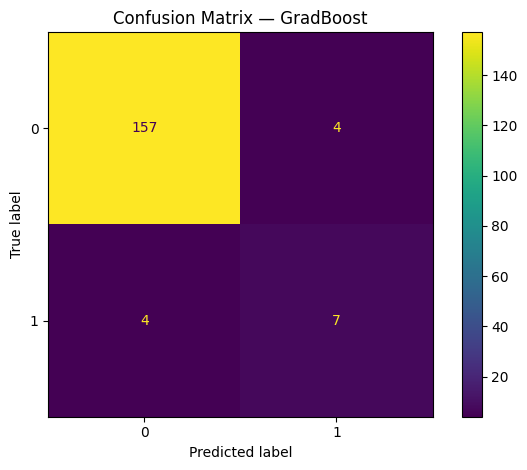

ROC-AUC (test): 0.85742518351214


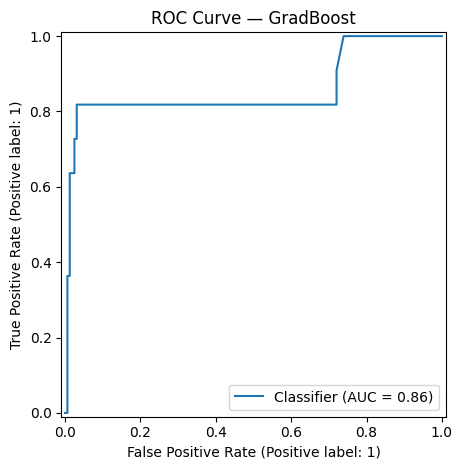

In [18]:

best_name = results_df.iloc[0]["model"]
best_pipe = pipes[best_name]
print("Mejor modelo (CV):", best_name)

best_pipe.fit(X_train, y_train)

# Predicciones
y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.show()

# ROC-AUC (si binario)
if set(pd.Series(y_test.dropna().unique()).tolist()).issubset({0,1}):
    y_proba = best_pipe.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_proba)
    print("ROC-AUC (test):", auc)
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve — {best_name}")
    plt.tight_layout()
    plt.show()


## 10) PCA (reducción dimensional) + modelo lineal

PCA es una técnica **multivariada** que captura la mayor varianza en menos componentes.
Aquí probamos:

- `PCA -> Logistic Regression`

y mostramos:
- varianza explicada acumulada,
- scatter de las 2 primeras componentes.


PCA+LogReg CV mean: {'acc': 0.93732148524278, 'f1': 0.630059476755129, 'recall': 0.8194444444444443, 'roc_auc': 0.9164298018949182}


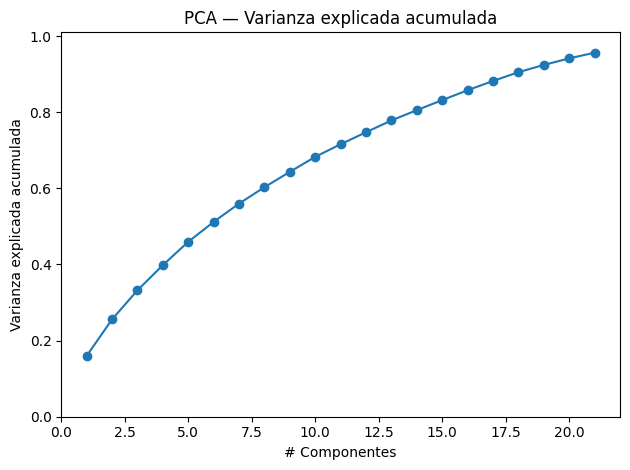

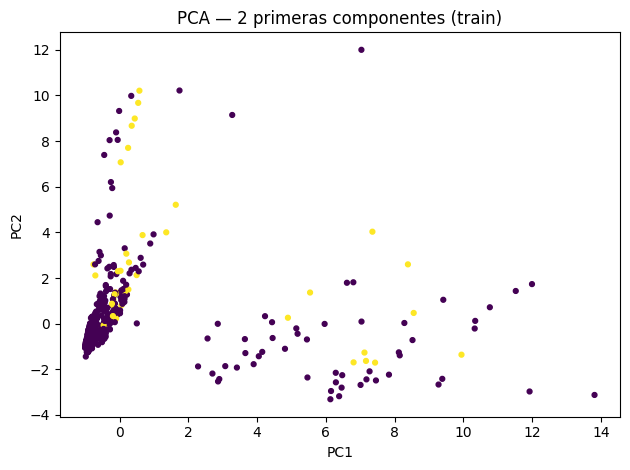

In [19]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

pca_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

scores = cross_validate(pca_pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
print("PCA+LogReg CV mean:", {k.replace("test_",""): float(np.mean(v)) for k,v in scores.items() if k.startswith("test_")})

pca_pipe.fit(X_train, y_train)

pca = pca_pipe.named_steps["pca"]
evr = pca.explained_variance_ratio_
evr_cum = np.cumsum(evr)

plt.figure()
plt.plot(range(1, len(evr_cum)+1), evr_cum, marker="o")
plt.ylim(0, 1.01)
plt.title("PCA — Varianza explicada acumulada")
plt.xlabel("# Componentes")
plt.ylabel("Varianza explicada acumulada")
plt.tight_layout()
plt.show()

# Scatter 2D con las primeras dos componentes (si hay al menos 2)
Z = pca.transform(pca_pipe.named_steps["prep"].transform(X_train))
if Z.shape[1] >= 2:
    plt.figure()
    plt.scatter(Z[:,0], Z[:,1], c=y_train, s=12)
    plt.title("PCA — 2 primeras componentes (train)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()


## 11) Variante: filtrado de outliers multivariados (IsolationForest) en entrenamiento

En vez de eliminar basado en una sola variable, usamos un detector **multivariado** sobre *X_train* preprocesado:

- Ajustamos `IsolationForest` sobre `X_train` (transformado),
- filtramos observaciones anómalas,
- re-entrenamos el mejor modelo y comparamos métricas en test.

> Esto es útil si se observan valores extremos que distorsionan modelos lineales o discriminantes.


Entrenamiento original: 686  | inliers: 665  | outliers: 21
== Evaluación en test (modelo re-entrenado con filtrado) ==
              precision    recall  f1-score   support

           0     0.9695    0.9876    0.9785       161
           1     0.7500    0.5455    0.6316        11

    accuracy                         0.9593       172
   macro avg     0.8598    0.7665    0.8050       172
weighted avg     0.9555    0.9593    0.9563       172



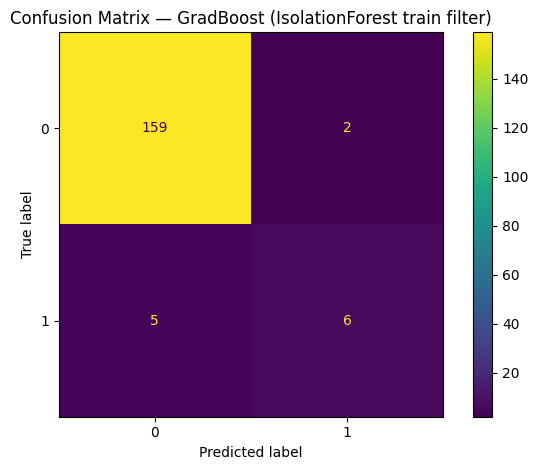

ROC-AUC (test) con filtrado: 0.875494071146245


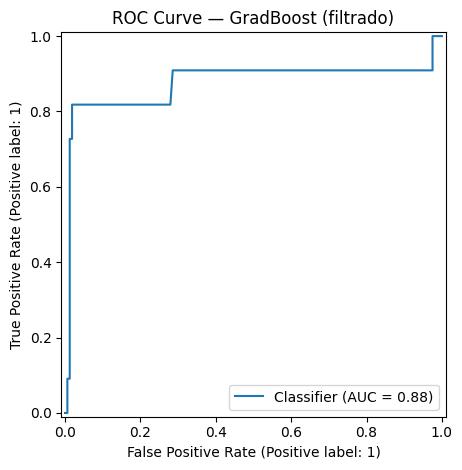

In [13]:

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# 1) Transform X_train con el "prep" del mejor pipeline (sin entrenar modelo)
prep_only = preprocess
Xtr_p = prep_only.fit_transform(X_train)
Xte_p = prep_only.transform(X_test)

iso = IsolationForest(contamination=0.03, random_state=42)
iso.fit(Xtr_p)
inlier_mask = iso.predict(Xtr_p) == 1

print("Entrenamiento original:", X_train.shape[0], " | inliers:", int(inlier_mask.sum()), " | outliers:", int((~inlier_mask).sum()))

# Re-entrenar SOLO el modelo (mismo algoritmo del mejor pipeline) sobre inliers
best_model = models[best_name]
best_model.fit(Xtr_p[inlier_mask], y_train.iloc[inlier_mask])

y_pred2 = best_model.predict(Xte_p)
print("== Evaluación en test (modelo re-entrenado con filtrado) ==")
print(classification_report(y_test, y_pred2, digits=4))

cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()
plt.title(f"Confusion Matrix — {best_name} (IsolationForest train filter)")
plt.tight_layout()
plt.show()

if set(pd.Series(y_test.dropna().unique()).tolist()).issubset({0,1}) and hasattr(best_model, "predict_proba"):
    y_proba2 = best_model.predict_proba(Xte_p)[:,1]
    auc2 = roc_auc_score(y_test, y_proba2)
    print("ROC-AUC (test) con filtrado:", auc2)
    RocCurveDisplay.from_predictions(y_test, y_proba2)
    plt.title(f"ROC Curve — {best_name} (filtrado)")
    plt.tight_layout()
    plt.show()
